In [130]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
import datetime

In [131]:
raw_data = pd.read_csv("E:\\python\\avocado.csv")

In [132]:
raw_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [133]:
raw_data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [134]:
raw_data.drop('Unnamed: 0',axis=1,inplace=True) # Here we are removing the 1st column which is just an index column.

In [135]:
raw_data.shape

(1517, 13)

In [136]:
raw_data.isnull().sum() # here we are checking for any null values in dataset

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

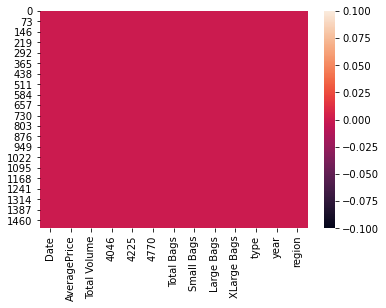

In [137]:
sns.heatmap(raw_data.isnull()) # heatmap also indicates that there are no null values in dataset.

In [138]:
raw_data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [139]:
raw_data['type'].unique() # from here we can confirm that there is only 1 type of avocado present in dataset.   

array(['conventional'], dtype=object)

In [140]:
#since machine learning requires data to be in numerical format for model building, we are converting / encoding columns 'type' 
#and 'region' into numerical format. 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
raw_data['type']=le.fit_transform(raw_data['type'])
raw_data['region']=le.fit_transform(raw_data['region'])
raw_data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,2015,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,2015,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,2015,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,2015,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7


In [141]:
count = 0
for i in raw_data['XLarge Bags']:
    if i == 0.00:
        count +=1
print("Total number of entries in column \'XLarge Bags\' with value 0.00 is:", count)        

Total number of entries in column 'XLarge Bags' with value 0.00 is: 798


In [142]:
# Here was can see that more than 50% of entries in column 'XLarge Bags' is having 0 value, we need to work on this column.

In [143]:
raw_data['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [144]:
raw_data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


In [145]:
#Here we can see that for many columns ther is quite difference between mean and 50% value which will need to be worked upon
#for better preductions.
#We can see difference/gap between max value and 75precentile value in most of the columns which indicates that there are 
#outliers present in dataset.

#Column 'XLarge Bags' has the highest difference between max and 75percentile. Also raw data analysis reveal that there are
#797 entries with value 0.00 in this column which is more than 50% of total entries. Even mean, std, min and max values of this
#column does not provide concrete values which we can use to replace 0.00 values with it.
#We will need to check whether do we need to use this column in model building process or not as it have impact on performance 
#of the model.

#Std deviation and mean has a big difference in all the columns. Will need to work on it for a good model.
#In column '4046', we can see difference between 25% and 50% is highest.


In [146]:
raw_data.groupby('year')['type'].value_counts() # here we are checking year wise sale of avocado 
#and can see that in 2015 sale of avocado was more than 5 times than that in 2016.

year  type
2015  0       1270
2016  0        247
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

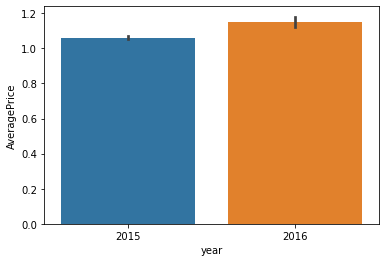

In [147]:
sns.barplot(x='year', y='AveragePrice', data=raw_data)

In [148]:
#from above barplot graph and checking year wise sale of avocado, we can say that since avocado was cheaper in 2015 than in 2016
# sale in year 2015 was more.

In [149]:
raw_data['Date'].min()

'01-02-2015'

In [150]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

In [151]:
dt1 = raw_data['Date'].min()
raw_data['Date'] = (raw_data['Date']-dt1).dt.days

In [152]:
raw_data.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [153]:
raw_data['Date']

0       359
1       352
2       345
3       161
4       331
       ... 
1512    653
1513    617
1514    404
1515    632
1516    625
Name: Date, Length: 1517, dtype: int64

Date               AxesSubplot(0.125,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Total Bags      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Small Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
type               AxesSubplot(0.465244,0.125;0.0945122x0.343182)
year               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
region             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

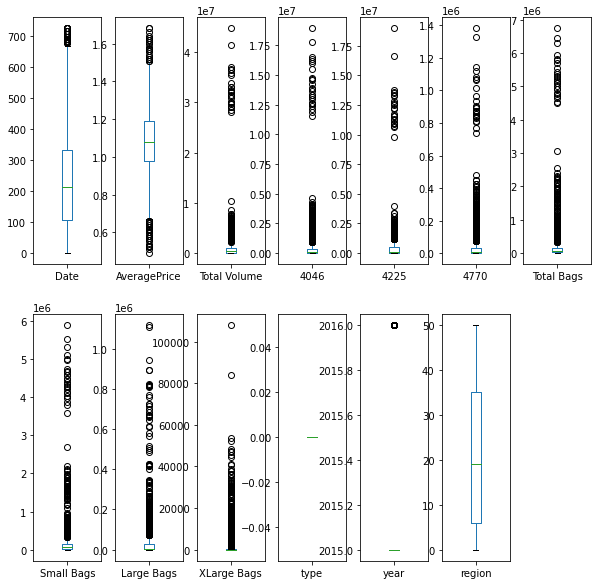

In [154]:
raw_data.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

In [155]:
raw_data.drop('type',axis=1,inplace=True)
raw_data.drop('XLarge Bags',axis=1,inplace=True)
#Here we are dropping column 'type' as there is only 1 type of avocado in dataset.
#We are dropping column 'XLarge Bags' as most of the entries in this column is 0.00 and will impact the performance of model.

In [156]:
raw_data.shape

(1517, 11)

In [157]:
Q1=raw_data.quantile(0.25)
Q3=raw_data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date               224.00
AveragePrice         0.21
Total Volume    834505.09
4046            357178.14
4225            443674.28
4770             28256.05
Total Bags      121402.79
Small Bags      116472.13
Large Bags       28726.93
year                 0.00
region              29.00
dtype: float64


In [158]:
print(raw_data < (Q1 - 1.5 * IQR)) or (raw_data> (Q3 + 1.5 * IQR))

       Date  AveragePrice  Total Volume   4046   4225   4770  Total Bags  \
0     False         False         False  False  False  False       False   
1     False         False         False  False  False  False       False   
2     False         False         False  False  False  False       False   
3     False         False         False  False  False  False       False   
4     False         False         False  False  False  False       False   
...     ...           ...           ...    ...    ...    ...         ...   
1512  False         False         False  False  False  False       False   
1513  False         False         False  False  False  False       False   
1514  False         False         False  False  False  False       False   
1515  False         False         False  False  False  False       False   
1516  False         False         False  False  False  False       False   

      Small Bags  Large Bags   year  region  
0          False       False  False   Fal

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year,region
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1512,False,False,False,False,False,False,False,False,False,True,False
1513,False,True,False,False,False,False,False,False,False,True,False
1514,False,False,False,False,False,False,False,False,False,True,False
1515,False,False,False,False,False,False,False,False,False,True,False


In [159]:
from scipy.stats import zscore
z=np.abs(zscore(raw_data))
z

array([[0.72586133, 1.35048079, 0.34696593, ..., 0.36004386, 0.44100815,
        1.3143384 ],
       [0.68485673, 1.45639674, 0.34907791, ..., 0.36000798, 0.44100815,
        1.3143384 ],
       [0.64385214, 0.76783831, 0.33478463, ..., 0.35996017, 0.44100815,
        1.3143384 ],
       ...,
       [0.98946233, 2.14485045, 0.32120275, ..., 0.29095317, 2.26753179,
        0.88028586],
       [2.32504069, 2.09189247, 0.31878364, ..., 0.29078309, 2.26753179,
        0.88028586],
       [2.28403609, 1.88006056, 0.3201721 , ..., 0.26226571, 2.26753179,
        0.88028586]])

In [160]:
threshold =3
print(np.where(z<3))
print(raw_data.shape)

(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(1517, 11)


In [161]:
data_new = raw_data[(z<3).all(axis = 1)]

In [162]:
data_new.shape

(1471, 11)

In [163]:
raw_data.shape

(1517, 11)

Date               AxesSubplot(0.125,0.536818;0.110714x0.343182)
AveragePrice    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Total Volume    AxesSubplot(0.390714,0.536818;0.110714x0.343182)
4046            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
4225            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
4770            AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.110714x0.343182)
Small Bags         AxesSubplot(0.257857,0.125;0.110714x0.343182)
Large Bags         AxesSubplot(0.390714,0.125;0.110714x0.343182)
year               AxesSubplot(0.523571,0.125;0.110714x0.343182)
region             AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

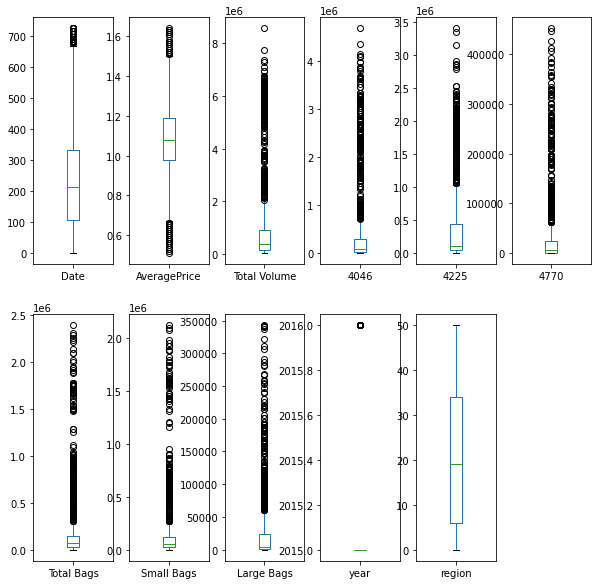

In [164]:
data_new.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [165]:
data_new.skew()

Date            0.932585
AveragePrice   -0.178772
Total Volume    2.392416
4046            2.776925
4225            2.116776
4770            3.188256
Total Bags      3.461998
Small Bags      3.647402
Large Bags      3.292584
year            1.825081
region          0.311945
dtype: float64

In [166]:
from scipy.stats import boxcox
#boxcox is used to remove skewness
#0 -> log transform
#.5 -> square root transform
#ds_skew = ['4770','Total Bags','Small Bags','Large Bags']
#for i in ds_skew:
#    ds_skew[i]=boxcox(ds_skew[i],0)

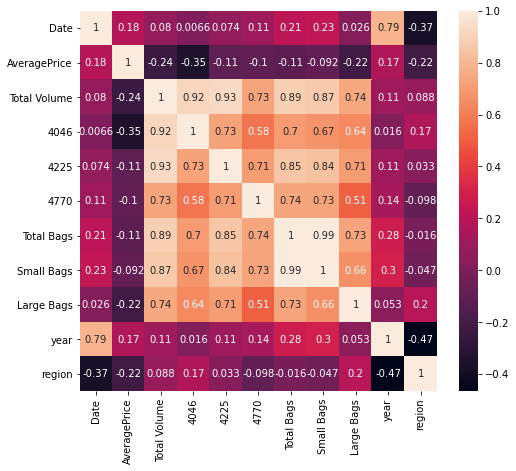

In [167]:
corr_hmap=data_new.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [168]:
#from above heat map we can see most of the values/columns are positively correlated with each other.
#column 'AveragePrice' is having negative correlation with most of columns but value of skewness is small.

In [169]:
data_new.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'year', 'region'],
      dtype='object')

In [170]:
x = data_new.iloc[:,2:] # Here I am not using 'Date' column in model building process as it has no impact in price prediction
#process.

In [171]:
x.shape

(1471, 9)

In [172]:
y = data_new.iloc[:,1]

In [173]:
y.shape

(1471,)

In [174]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [175]:
scale = StandardScaler()

In [176]:
x=scale.fit_transform(x)

In [177]:
x.shape

(1471, 9)

In [178]:
models = [KNeighborsRegressor(),DecisionTreeRegressor(),LinearRegression()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=r2_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.8569303739943734 of model: KNeighborsRegressor() with best random state value is: 78


In [179]:
knn=KNeighborsRegressor()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
parameters={'n_neighbors':range(1,25)}
gs=GridSearchCV(knn, parameters)
gs.fit(train_x,train_y)
gs.best_params_

{'n_neighbors': 2}

In [180]:
knn=KNeighborsRegressor(n_neighbors=2)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
knn.fit(train_x,train_y)
predknn = knn.predict(test_x)
print("R2 score:",r2_score(predknn,test_y))
print("Absolute squarred error:", mean_absolute_error(test_y,predknn))
print("Mean squarred error:", mean_squared_error(test_y,predknn))

R2 score: 0.8479362896742628
Absolute squarred error: 0.05559322033898305
Mean squarred error: 0.005637457627118645


Text(0, 0.5, 'Predicted values')

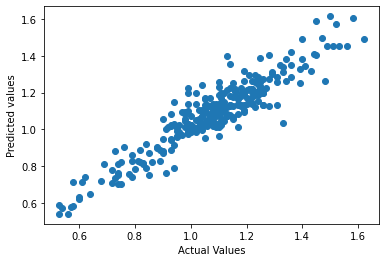

In [181]:
plt.scatter(x=test_y,y=predknn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [182]:
#In scatter plot graph we can see that the actual value and predicted values are very close to each other, which indicates
#that the line is best fit line and our model prediction is in line with actual values.

In [183]:
output_data_knn=pd.DataFrame(predknn)
output_data_knn.to_csv("E:\\python\\Avocado_prediction_price.csv",header=0)

In [184]:
#Prediction with Region

In [185]:
x_region = data_new.iloc[:,1:-1]

In [186]:
x_region

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,2015
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,2016
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,2016
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,2016
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,2016


In [187]:
x_region.shape

(1471, 9)

In [188]:
y_region = data_new.iloc[:,-1]

In [189]:
y_region

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1471, dtype: int32

In [190]:
y_region.shape

(1471,)

In [191]:
x_region=scale.fit_transform(x_region)

In [192]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [193]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
max_score = 0
for i in range(1,100):
    train_x_reg,test_x_reg,train_y_reg,test_y_reg=train_test_split(x_region,y_region,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x_reg,train_y_reg)
        pred=j.predict(test_x_reg)
        temp_score=accuracy_score(pred,test_y_reg)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.9322033898305084 of model: DecisionTreeClassifier() with best random state value is: 10


In [194]:
dtc=DecisionTreeClassifier()
train_x_reg,test_x_reg,train_y_reg,test_y_reg=train_test_split(x_region,y_region,test_size=.20,random_state=final_temp_state)
dtc.fit(train_x_reg,train_y_reg)
preddtc = dtc.predict(test_x_reg)
print("Accuracy score:", accuracy_score(test_y_reg,preddtc))
print("Confusion matrix:\n", confusion_matrix(test_y_reg, preddtc))
print("Classification report:",classification_report(test_y_reg,preddtc))

Accuracy score: 0.9186440677966101
Confusion matrix:
 [[15  0  0 ...  0  0  0]
 [ 0 12  0 ...  1  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0  1]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.86      0.89        14
           2       0.91      0.95      0.93        21
           3       1.00      0.94      0.97        16
           4       1.00      0.78      0.88         9
           5       0.92      1.00      0.96        12
           6       0.89      1.00      0.94        16
           7       0.75      0.86      0.80         7
           8       1.00      0.83      0.91         6
           9       0.75      1.00      0.86         6
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         8
          

In [195]:
cross_score=cross_val_score(dtc,x_region,y_region,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.72542373 0.84693878 0.84013605 0.88435374 0.76870748]
Cross validation mean score is= 0.8131119566470657
Cross validation standard deviation score is= 0.057638407376577376


In [196]:
from sklearn.metrics import roc_auc_score,roc_curve

In [197]:
probability = dtc.predict_proba(test_x_reg)[:,1]
probability

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [198]:
fpr,tpr,threshold = roc_curve(test_y_reg,probability,pos_label=True)

In [199]:
print(fpr)
print(tpr)
print(threshold)

[0.         0.00355872 1.        ]
[0.         0.85714286 1.        ]
[2. 1. 0.]


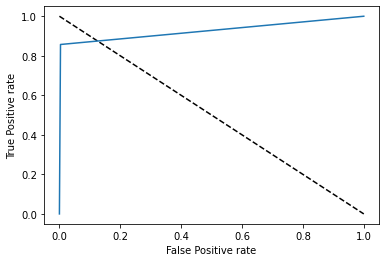

In [200]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "DecisionTreeClassifier")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

Text(0, 0.5, 'Predicted values')

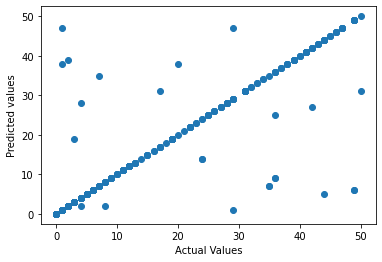

In [201]:
plt.scatter(x=test_y_reg,y=preddtc)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")

In [202]:
output_data_dtc=pd.DataFrame(preddtc)
output_data_dtc.to_csv("E:\\python\\Avocado_prediction_region.csv",header=0)

In [203]:
import joblib
joblib.dump(knn,'E:\\python\\Avocado_prediction_price.obj')
joblib.dump(dtc,'E:\\python\\Avocado_prediction_region.obj')

['E:\\python\\Avocado_prediction_region.obj']